In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [8]:
img = Image.open("photo1.jpg")
print(img)
img = img.convert("L") 

img_array = np.array(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=823x961 at 0x19D7C1D3290>


In [9]:
img_array.shape

(961, 823)

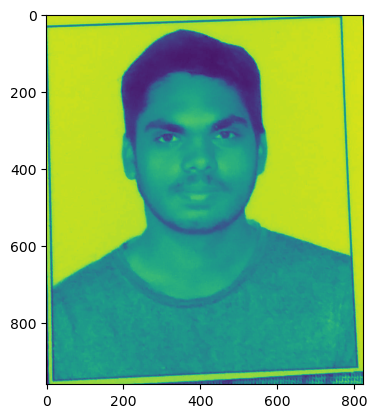

In [10]:
plt.imshow(img_array)

In [13]:
pca_components = 50
pca = PCA(n_components=pca_components)
pca_reduced = pca.fit_transform(img_array)
print(pca_reduced.shape)

(961, 50)


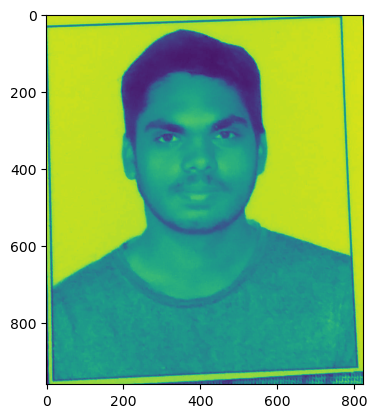

In [14]:
plt.imshow(img_array)

In [17]:
recinstructed = pca.inverse_transform(pca_reduced)

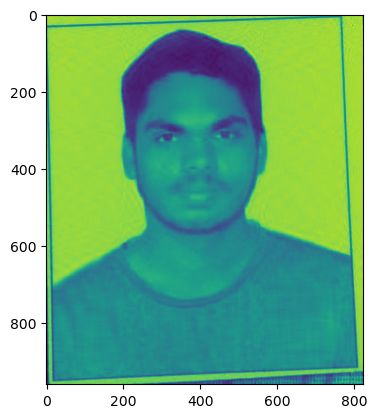

In [18]:
plt.imshow(recinstructed)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

# Load color image
img = Image.open("photo1.jpg")   # replace with your image file
img = np.array(img) / 255.0          # normalize [0,1]

# Separate RGB channels
channels = []
for i in range(3):   # R, G, B
    channel = img[:, :, i]
    h, w = channel.shape
    channel_flat = channel.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=30)  # adjust components
    channel_pca = pca.fit_transform(channel_flat)
    channel_reconstructed = pca.inverse_transform(channel_pca)

    # Reshape back to image
    channel_reconstructed = channel_reconstructed.reshape(h, w)
    channels.append(channel_reconstructed)

# Stack channels back into RGB
img_reconstructed = np.stack(channels, axis=2)

# Show original vs PCA reconstructed
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("PCA Compressed Image")
plt.imshow(img_reconstructed)
plt.axis("off")

plt.show()


ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=1 with svd_solver='covariance_eigh'